# Airline Revenue Project
## Analyzing revenue per seat mile in the US commercial airline industry

### Introduction

To complement an investment analysis in the US commercial airline industry, I dedicated some time to research indicators beyond the usual financial data available across different market data sources.

During this research, I came across the Airline Data Project (ADP) website, an effort leaded by the MIT Global Airline Industry Program "to better understand the opportunities, risks and challenges" of the industry. The ADP website offers consolidated data regarding revenue, expenses, compensation, traffic, capacity and other financial indicators.

With the objective to answer the question "which airline is most efficient in terms of revenue?", I decided to run a quick data project to analyze and compare the two main indicators of efficiency across the industry: TRESM (Total Revenue per Equivalent Seat Mile) and PRESM (Passenger Revenue per Equivalent Seat Mile).

For some context, the Revenue per Available Seat Mile is a metric obtained by dividing the operating income by the number of seats available multiplied by the number of miles flown. The number of seats available take into account all the seats across the commercial fleet; optimization of both, number of seats and miles flown, are critical to drive up this metric.

Three charts or visualizations were produced in this project, all related to RESM: metrics for 2017, time series for last ten years (2008–2017) and a ratio denominated Price/RESM. The latter calculates the stock price by the current revenue per equivalent seat mile (RESM) and tells how many times revenue a particular airline's stock is trading. Taking as an example the price/earnings ratio (P/E), lower values are preferred over high ratios.

As an arbitrary classification for the Price/RESM ratio, I used the following scale to analyze the stocks:
- Overvalued: ratios higher than 3
- Value: ratios between 1.5 and 3
- Undervalued: ratios lower 1.5

It is necessary to note that the RESM is expressed in cents (1/100) while stock prices are in USD. To facilitate comparison and to have ratios with natural numbers, RESM is used in cents and not in USD.

All the data used in the project was sourced from the ADP website and cleaned for the purpose of this study. Airlines not operating as of 2018 (Continental, Northwest, US Airways, America West, Airtran) were removed, as well as those not listed in the stock market (Frontier). The clean dataset can be viewed at the following [Google Spreadsheet](https://docs.google.com/spreadsheets/d/1vhxS5A3Xh026HTdob0vpF_dvyT493IxhdFON2ptJ2GE)

In [1]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
src = 'Source: http://web.mit.edu/airlinedata/www/Revenue&Related.html'

### Data
The following cells read the CSV dataset from Google spreadsheet and loads them into a dataframe.
TRESM is for Total Revenue per Equivalent Seat Mile (Ex-Transport)
PRESM is for Passenger Revenue per Equivalent Seat Mile

The difference in value between them is the additional revenue coming from baggage and cancellation fees 
and other miscellaneous operating revenues (upgrades, changes, etc).

In [3]:
# loads data from Google spreasheet
tresm_id = '0';
presm_id = '1753077094'
base = 'https://docs.google.com/spreadsheets/d/1pkti0TCovPpGtCYi__cbZwbmpCAh_e478MBWgGZMnOo/export?format=csv&gid='

In [4]:
df_t = pd.read_csv(base + tresm_id, index_col=1)
df_t

,name,price,type,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,American,37.38,network,10.51,10.95,11.28,11.44,10.8,11.96,10.76,...,12.63,11.60,12.80,13.57,14.13,14.47,14.85,13.75,13.13,13.69
DAL,Delta,51.14,network,8.84,9.02,9.28,9.42,9.3,9.69,8.62,...,12.92,11.70,12.85,13.98,14.70,14.91,15.36,14.82,14.09,14.55
UAL,United,72.62,network,9.84,10.37,10.63,10.46,10.37,11.27,9.78,...,13.37,11.50,14.09,15.45,15.42,15.87,16.36,15.60,14.57,14.46
LUV,Southwest,53.22,lcc,5.37,5.72,5.91,6.08,6.31,6.83,6.21,...,8.04,7.93,9.19,9.90,10.16,10.37,10.96,11.16,11.02,11.00
JBLU,jetBlue,19.52,lcc,-,-,-,-,-,7.19,7.62,...,10.05,9.43,10.15,11.16,11.44,11.66,11.91,12.15,11.55,11.49
Virgin,Virgin America,NaN,lcc,-,-,-,-,-,-,-,...,8.79,8.97,10.84,12.07,12.11,12.68,13.10,12.77,12.23,11.77
ALK,Alaska,61.80,other,7.25,7.57,8.11,8.09,8.37,9,8.61,...,10.75,10.63,11.56,12.51,12.97,13.43,13.04,12.36,11.93,12.16
HA,Hawaiian,36.50,other,4.52,4.7,4.82,4.86,8.2,5.51,5.49,...,9.25,8.31,9.16,10.38,10.39,10.53,10.82,10.45,10.78,11.55
SAVE,Spirit,40.06,other,7.72,6.77,6.67,7.62,7.22,7.73,8.2,...,8.77,8.47,8.65,10.10,10.15,10.64,10.60,9.17,8.30,8.28


In [5]:
df_p = pd.read_csv(base + presm_id, index_col=1)
df_p

,name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,American,9.91,10.32,10.66,10.84,10.23,11.35,10.21,9,9.31,...,11.82,10.48,11.55,12.28,12.86,13.25,13.55,12.32,11.80,12.33
DAL,Delta,8.32,8.51,8.71,8.82,8.71,9.27,8.08,7.83,8.28,...,11.45,9.78,10.96,11.85,12.35,12.64,13.09,12.59,11.90,12.20
UAL,United,9.17,9.7,9.87,9.67,9.59,10.47,9.08,8.71,8.69,...,12.16,10.40,12.75,14.00,14.05,14.49,14.89,14.17,13.25,13.11
LUV,Southwest,5.18,5.5,5.65,5.8,6.01,6.53,5.93,5.66,5.82,...,7.47,7.34,8.46,9.14,9.21,9.83,10.43,10.34,10.06,9.98
JBLU,jetBlue,-,-,-,-,-,6.99,7.41,8.15,7.94,...,9.43,8.79,9.57,10.58,10.85,11.07,11.29,11.46,10.81,10.73
Virgin,Virgin America,-,-,-,-,-,-,-,-,-,...,8.13,8.18,9.96,11.22,11.23,11.65,11.84,11.53,11.06,10.84
ALK,Alaska,6.43,6.8,7.38,7.42,7.74,8.37,7.98,7.77,7.96,...,9.87,9.57,10.32,11.10,11.56,11.42,11.58,11.05,10.60,10.85
HA,Hawaiian,3.92,4.03,4.03,4.12,6.86,4.4,4.5,5.95,6.72,...,8.62,7.57,8.31,9.53,9.53,9.65,9.86,9.48,9.84,10.54
SAVE,Spirit,7,5.8,5.26,6.75,6.75,6.77,7.12,7.06,7.74,...,7.33,6.69,6.36,6.95,6.45,6.76,6.74,5.43,4.69,4.70


### Revenue per Equivalent Seat Mile (2017)

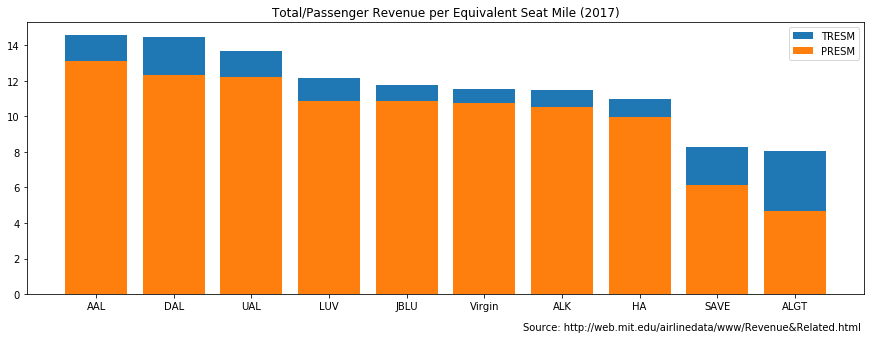

In [62]:
t = 'Total/Passenger Revenue per Equivalent Seat Mile (2017)'
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(list(df_t.index), df_t['2017'].sort_values(ascending=False), label='TRESM')
ax.bar(list(df_p.index), df_p['2017'].sort_values(ascending=False), label='PRESM')
ax.annotate(src, xy=(1, 1), xytext=(5.5, -2))
ax.legend()
plt.title(t)
plt.show()

### Revenue per Equivalent Seat Mile (RESM, Ex-Transport) - Time Series (2008-2017)

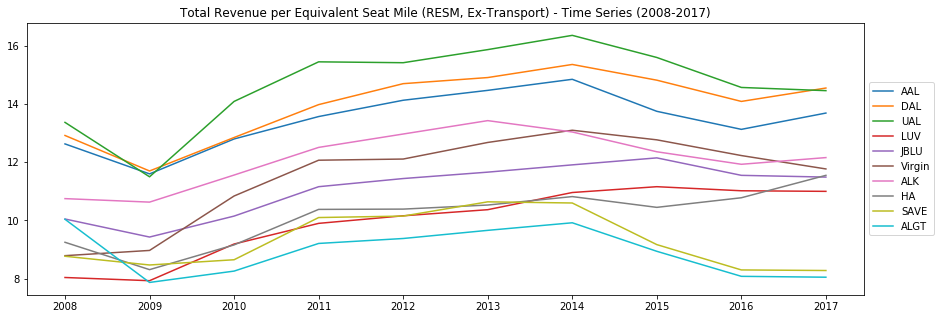

In [74]:
def plot_series(df):
    fig, ax = plt.subplots(figsize=(15, 5))
    tickers = df.index.values
    for i in tickers:
        ax.plot(df.loc[i][-10:],'-', label=i)
    plt.title('Total Revenue per Equivalent Seat Mile (RESM, Ex-Transport) - Time Series (2008-2017)')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
plot_series(df_t)

### Price/RESM Ratio
The following calculate the price to revenue per equivalent seat mile (RESM) ratio.  
This metric tells how many times revenue a particular airline's stock is trading.

Takings as an example the price/earnings ratio (P/E), lower values are preferred over high ratios.

As an arbitrary classification, I used the following scale to analyze the stocks:
* Overvalued: ratios higher than 3
* Value: ratios between 1.5 and 3
* Undervalued: ratios lower 1.5

---

Note: RESM is expressed in cent dollar (1/100). Stock prices are in USD.  
To facilitate comparison and to have ratios with natural numbers, RESM is used in cents and not in USD.po

In [76]:
df_t['price/resm'] = df_t['price']/df_t['2017']
s = df_t['price/resm'].sort_values(ascending=False)
s

ticker
ALGT      17.267081
ALK        5.082237
UAL        5.022130
LUV        4.838182
SAVE       4.838164
DAL        3.514777
HA         3.160173
AAL        2.730460
JBLU       1.698869
Virgin          NaN
Name: price/resm, dtype: float64

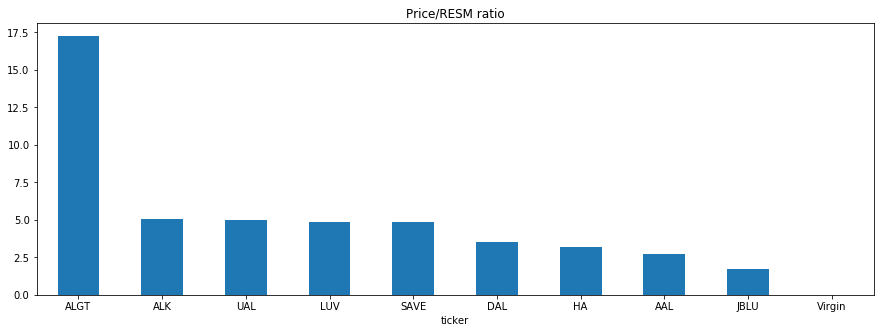

In [85]:
s.plot(kind='bar', sort_columns=True, title='Price/RESM ratio', figsize=(15, 5))
plt.xticks(rotation=0)
ax.annotate(src, xy=(10, 10), xytext=(3, 2.5))
plt.show()

### Conclusion

The first chart does not show any surprising facts, we can see that network airlines (AAL, UAL, DAL) have the highest revenue per available seat mile across the industry. Revenue that comes primarily from serving the commercial business segment.

Given recent merge of Virgin Airlines and Alaska, it would be interesting to see the RESM for ALK in 2018 and analyze how it stands against the major operators. Based on the synergies and efficiencies expected on its operations (and from what is observed in the trendline), we would probably see a RESM equal or greater than 13 cents at the end of 2018.

Another interesting finding is how Hawaiian Airlines have been increasing its RESM constantly in the last years: from 10.38 in 2011 to 11.55 in 2018. Another one to keep an eye on.

Finally, the price/RESM ratio shows that all airlines are overvalued based on the arbitrary classification proposed above. JetBlue Airlines is the only one that stands out in this metric, with a price/RESM ratio of 1.67 (19.28/11.45). It also necessary to comment on the outlier in the price/RESM ration chart, ALGT. The price of this company does not reflect solely the airline business, as it also leases spare engines and offers management solutions to golf courses.

## Source
Massachusetts Institute of Technology. (2018, July 15). Airline Data Project. Retrieved from http://web.mit.edu/airlinedata/www/Revenue&Related.html


## Disclaimer
All investing is subject to risk, including the possible loss of the money you invest.

I am not a licensed investment advisor or professional. The data contained in this file is to be viewed mainly for educational and/or entertainment purposes only. I'm not liable for any action in the stock market. Any information published here is not a recommendation to buy or sell any security.